In [127]:
import numpy
import scipy
import sklearn
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os 
import json

In [1]:
import json
# import csv
import unicodecsv as csv

with open('Input.json') as data_file:
    data = json.loads(data_file.read())

In [2]:
data

{'InputPath': ['C:/Development/TradingSystemDev/FolderWithInputFiles'],
 'TradeSplitterFiles': ['Trades_Calculation_0m-3m',
  'Trades_Calculation_0m-6m',
  'Trades_Calculation_0m-12m'],
 'OutputPath': 'C:/Development/TradingSystemDev/FolderWithOutputFiles/',
 'DataFrameFilters': [{'EntrySeconds': 'Maximum', 'Maximum': '420'},
  {'PositionType': 'Equals', 'Equals': 'Short'},
  {'Float': 'MinimumMaximum', 'Minimum': '0', 'Maximum': '500000000'},
  {'EntryPrice': 'MinimumMaximum', 'Minimum': '20', 'Maximum': '180'}],
 'DependentVariable_Classification': 'WinTrade',
 'DependentVariable_Regression': 'PercentageProfit',
 'IndependentVariables': 'EntrySeconds,Float,Vol1MinRatioMaxPD123,Vol1MinRatioMaxPD123_TotalVolume,AllExchangesVolume,IntradayCurrentMarketGapPerc,Fund52WeekChange,FundShortRatio,FundShortPercofFloat',
 'OptimizationParameter': 'Sum(NetProfit)'}

In [2]:
data = pd.read_csv('Trades_Calculation_0m-6m.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (116,117,118,121,129,132,137,141,146,162,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(data.head(6))

  Symbol PositionType  Size  EntryDate  ExitDate EntryTime ExitTime TradeTime  \
0   WYNN         Long  1000   20181203  20181203   30:53.2  31:12.6   00:19.3   
1   AETI         Long  1000   20181203  20181203   30:10.1  31:19.3   01:09.2   
2   NVDA         Long  1000   20181203  20181203   30:31.1  31:22.3   00:51.2   
3    AMD         Long  1000   20181203  20181203   30:41.1  31:23.3   00:42.2   
4   NVDA         Long  1000   20181203  20181203   31:04.1  32:01.2   00:57.1   
5   NVDA         Long  1000   20181203  20181203   31:09.1  32:04.2   00:55.1   

   EntryPrice  ExitPrice  ...    GP  IH_PH  IL_PL  PreMarketHigh_BA_Delta  \
0      120.27    120.208  ...  GpUp     IH     PL                1.086560   
1        1.15      1.154  ...  GpUp     IH     PL                0.000000   
2      173.95    173.898  ...  GpUp     IH     PL                1.982942   
3       22.67     22.668  ...  GpUp     IH     PL               -0.987952   
4      174.43    173.570  ...  GpUp     IH     

In [4]:
#Available data

for i in range(len(data.columns)):
    print(data.columns[i])

Symbol
PositionType
Size
EntryDate
ExitDate
EntryTime
ExitTime
TradeTime
EntryPrice
ExitPrice
NetProfit
PercentageProfit
WinTrade
LossTrade
EntrySignal
ExitSignal
EntryCost
ExitCost
MFEPrice
MAEPrice
MFE
MAE
MfeMaeRatio
MFEPercentage
MAEPercentage
MFEFirst
MAEFirst
MFETime
MAETime
IntradayDrawDown
IntradayDrawDownTime
PeakNetProfit
PeakNetProfitTime
StrategyID
DayOfWeek
DayOfMonth
EntryNumber
Vol1MinRatioMaxPD123
Vol1MinRatioMaxPD123_TotalVolume
Vol1MinRatioMaxPD123_Volume
Vol1MinRatioMaxPD123_Time
Vol1Min
PreMarketVolume
AllExchangesVolume
Float
PreMarketCurrentGap
PreMarketCurrentGapPerc
PreMarketOpenGapPerc
PreMarketMaxGapUpPerc
PreMarketMaxGapDnPerc
IntradayCurrentMarketGapPerc
CurrentGapPercToPreMarketMaxGapUpPercRatio
CurrentGapPercToPreMarketMaxGapDnPercRatio
IntradayMarketGapPerc
IntradayMarketMaxGapUpPerc
IntradayMarketMaxGapDnPerc
Current_Vol_1Min_PD_Av_1_2_3_10Bars_Ratio
Current_Vol_1Min_PD_Av_2_3_10Bars_Ratio
Current_Vol_1Min_PD_Av_1_10Bars_Ratio
Current_Vol_1Min_PD_Av_1_2_

# Data PreProcessing

In [5]:
def equals(d,keys,values):
    return d[d[keys]==values]

In [6]:
d1=equals(data,'PositionType','Short')

In [7]:
def between(d,key,v1,v2):
    return d.query("'"+str(v1)<=key<=str(v2)+"'")

In [8]:
"'"+str(5)<='key'<=str(2)+"'"

False

In [9]:
#d1=between(d1,'EntrySeconds',0,420)

In [10]:
d1=d1[d1.Float<= 500000000]

In [11]:
d1=d1.query('20<=EntryPrice<=180')

In [12]:
d1=d1.query('0<=EntrySeconds<=420')

In [13]:
d1.head()

,Symbol,PositionType,Size,EntryDate,ExitDate,EntryTime,ExitTime,TradeTime,EntryPrice,ExitPrice,...,GP,IH_PH,IL_PL,PreMarketHigh_BA_Delta,PreMarketLow_BA_Delta,PH_ba,PL_ba,DollerPerShare,Max_AllExchangesVolume_ADV_3D_Ratio,IntradayOpenCurrentGapDifPerc
9,X,Short,-1000,20181203,20181203,32:00.1,32:35.6,00:35.5,23.94,23.920,...,GpUp,PH,PL,-32.969697,45.676768,PHdmx,PLumx,10,5.5,0.347072
16,SFM,Short,-1000,20181203,20181203,32:06.4,33:56.6,01:50.2,23.95,24.290,...,GpUp,IH,PL,5.026820,37.072797,PHu10,PLumx,-170,15.4,-0.391304
23,CTRP,Short,-1000,20181203,20181203,32:58.2,35:05.3,02:07.1,30.16,30.630,...,GpUp,IH,PL,-11.058373,11.467943,PHdmx,PLumx,-235,9.7,0.485269
24,STX,Short,-1000,20181203,20181203,31:46.2,35:08.0,03:21.9,43.84,43.796,...,GpUp,PH,PL,-42.606186,16.886598,PHdmx,PLumx,22,4.0,0.162451
25,STX,Short,-1000,20181203,20181203,31:49.2,35:08.0,03:18.9,43.84,43.800,...,GpUp,PH,PL,-49.509434,19.622642,PHdmx,PLumx,20,4.0,0.162451


In [14]:
d1=d1.replace('∞%','0%')

In [15]:
d1.Fund52WeekChange.value_counts()

0%         325
145.06%     98
44.79%      77
8.55%       72
-52.51%     45
-38.48%     44
-24.44%     37
-57.89%     31
144.23%     30
-29.30%     29
-38.43%     28
92.12%      28
139.34%     27
-19.36%     27
52.18%      27
-62.23%     27
-35.41%     26
-25.38%     25
11.14%      25
-36.97%     24
-56.98%     21
-32.72%     21
-52.76%     21
-30.49%     20
-24.57%     20
-4.53%      19
-34.12%     19
52.19%      19
-21.82%     18
-18.61%     17
          ... 
-28.04%      1
-16.83%      1
-28.22%      1
39.93%       1
-32.39%      1
-31.52%      1
208.26%      1
-21.22%      1
39.82%       1
19.57%       1
-49.90%      1
-20.92%      1
-58.63%      1
-21.94%      1
24.24%       1
25.43%       1
-16.65%      1
14.07%       1
21.99%       1
18.90%       1
-4.38%       1
40.64%       1
-28.81%      1
15.25%       1
-18.63%      1
-44.03%      1
-35.10%      1
-11.90%      1
-1.32%       1
48.22%       1
Name: Fund52WeekChange, Length: 395, dtype: int64

In [16]:
type(d1.Fund52WeekChange.iloc[2])

str

In [17]:
d1.shape

(2888, 188)

In [18]:
d1.corr()

,Size,EntryDate,ExitDate,EntryPrice,ExitPrice,NetProfit,PercentageProfit,WinTrade,LossTrade,EntryCost,...,Fund5YearAverageDividendYield,Column1,PR,PRFIL,EntrySeconds,PreMarketHigh_BA_Delta,PreMarketLow_BA_Delta,DollerPerShare,Max_AllExchangesVolume_ADV_3D_Ratio,IntradayOpenCurrentGapDifPerc
Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EntryDate,NaN,1.000000,1.000000,-0.002109,-0.001869,-0.006308,-0.030239,-0.007616,0.005261,0.002109,...,-0.007944,NaN,-0.034128,-0.034128,-0.008374,-0.007048,0.015263,-0.006308,0.070466,0.053936
ExitDate,NaN,1.000000,1.000000,-0.002109,-0.001869,-0.006308,-0.030239,-0.007616,0.005261,0.002109,...,-0.007944,NaN,-0.034128,-0.034128,-0.008374,-0.007048,0.015263,-0.006308,0.070466,0.053936
EntryPrice,NaN,-0.002109,-0.002109,1.000000,0.999337,-0.095811,-0.033023,-0.040481,0.042752,-1.000000,...,-0.024365,NaN,0.710648,0.710648,0.005420,0.045018,-0.015034,-0.095811,-0.031230,-0.034259
ExitPrice,NaN,-0.001869,-0.001869,0.999337,1.000000,-0.131999,-0.063903,-0.062982,0.065276,-0.999337,...,-0.024260,NaN,0.712700,0.712700,0.004163,0.045947,-0.015555,-0.131999,-0.030701,-0.033438
NetProfit,NaN,-0.006308,-0.006308,-0.095811,-0.131999,1.000000,0.847748,0.619595,-0.620486,0.095811,...,-0.000105,NaN,-0.137061,-0.137061,0.033748,-0.030523,0.015945,1.000000,-0.010883,-0.018524
PercentageProfit,NaN,-0.030239,-0.030239,-0.033023,-0.063903,0.847748,1.000000,0.667738,-0.668498,0.033023,...,-0.001565,NaN,-0.054785,-0.054785,0.030637,-0.045954,0.025699,0.847748,-0.040394,-0.007899
WinTrade,NaN,-0.007616,-0.007616,-0.040481,-0.062982,0.619595,0.667738,1.000000,-0.993632,0.040481,...,0.029048,NaN,-0.084200,-0.084200,0.030160,-0.032863,0.030138,0.619595,-0.004154,-0.012635
LossTrade,NaN,0.005261,0.005261,0.042752,0.065276,-0.620486,-0.668498,-0.993632,1.000000,-0.042752,...,-0.028240,NaN,0.086005,0.086005,-0.027533,0.030972,-0.031468,-0.620486,0.005625,0.011002
EntryCost,NaN,0.002109,0.002109,-1.000000,-0.999337,0.095811,0.033023,0.040481,-0.042752,1.000000,...,0.024365,NaN,-0.710648,-0.710648,-0.005420,-0.045018,0.015034,0.095811,0.031230,0.034259


In [19]:
import seaborn as sns

In [20]:
d2=d1[['EntrySeconds','Float','Vol1MinRatioMaxPD123','Vol1MinRatioMaxPD123_TotalVolume','AllExchangesVolume','IntradayCurrentMarketGapPerc','Fund52WeekChange','FundShortRatio','FundShortPercofFloat','WinTrade','PercentageProfit','NetProfit']]

In [21]:
X=d2[['EntrySeconds','Float','Vol1MinRatioMaxPD123','Vol1MinRatioMaxPD123_TotalVolume','AllExchangesVolume','IntradayCurrentMarketGapPerc','Fund52WeekChange','FundShortRatio','FundShortPercofFloat']]
Y=d2.WinTrade

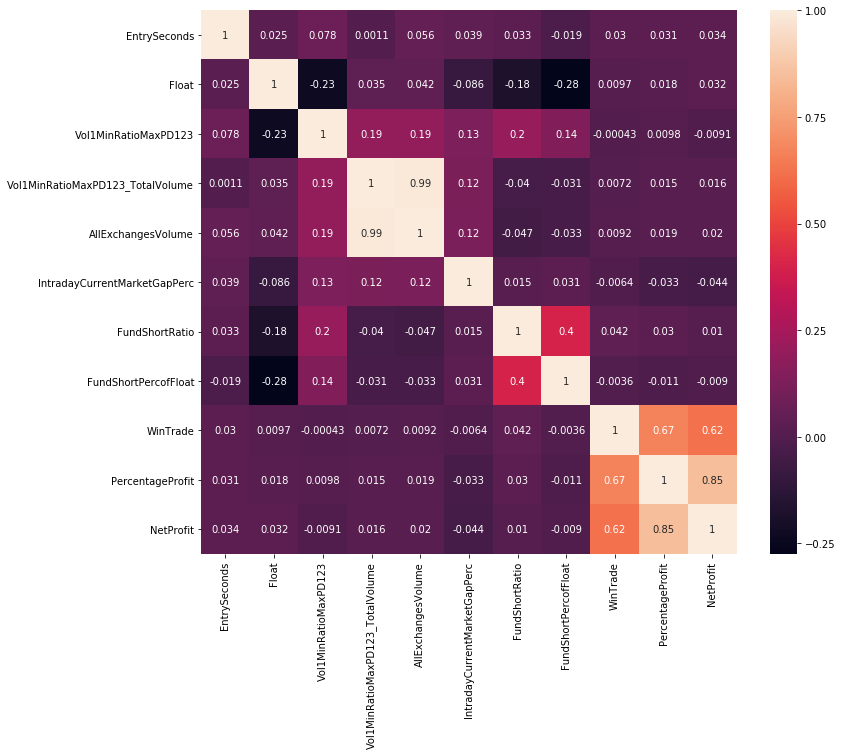

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(d2.corr(),annot=True)

In [23]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2888 entries, 9 to 28840
Data columns (total 12 columns):
EntrySeconds                        2888 non-null float64
Float                               2888 non-null int64
Vol1MinRatioMaxPD123                2888 non-null float64
Vol1MinRatioMaxPD123_TotalVolume    2888 non-null int64
AllExchangesVolume                  2888 non-null int64
IntradayCurrentMarketGapPerc        2888 non-null float64
Fund52WeekChange                    2888 non-null object
FundShortRatio                      2888 non-null float64
FundShortPercofFloat                2888 non-null float64
WinTrade                            2888 non-null int64
PercentageProfit                    2888 non-null float64
NetProfit                           2888 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 293.3+ KB


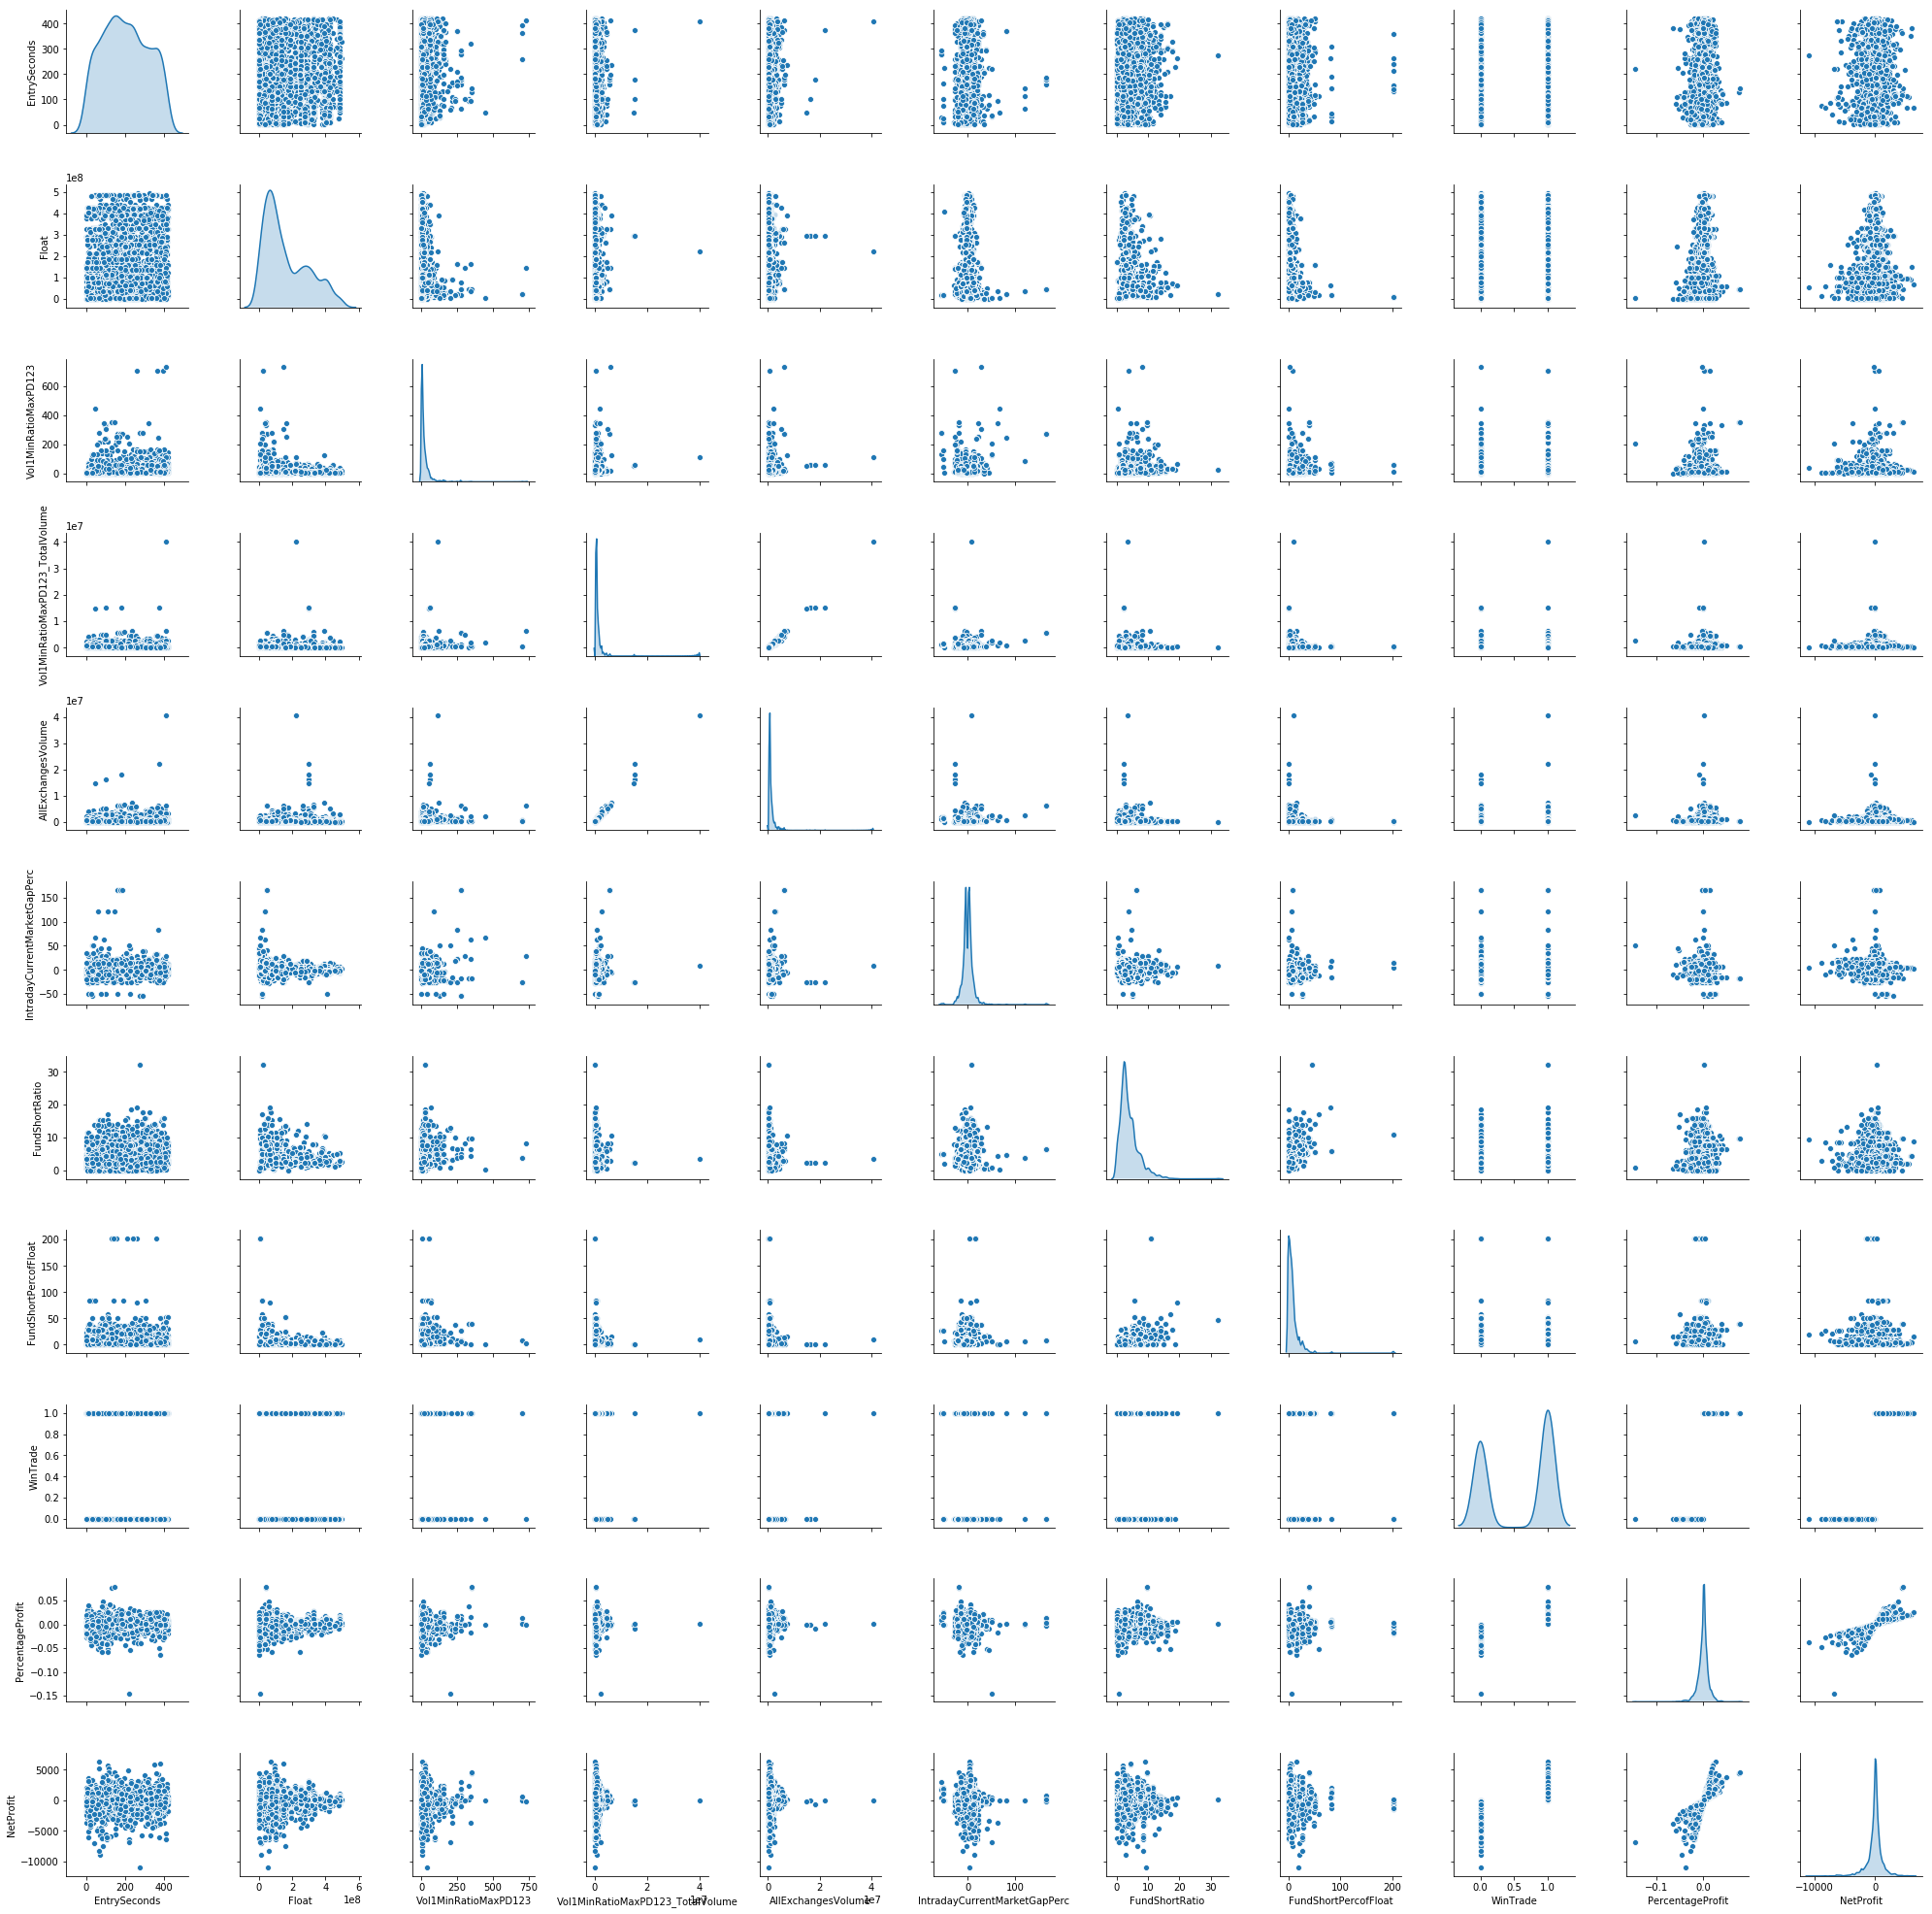

In [24]:
sns.pairplot(d2,diag_kind='kde')

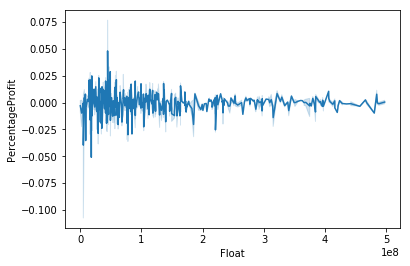

In [25]:
sns.lineplot(d2.Float,d2['PercentageProfit'])

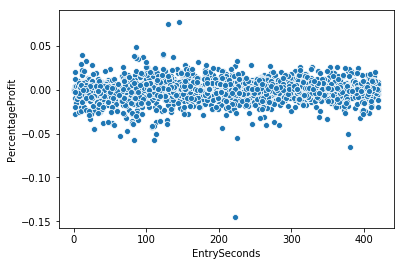

In [26]:
sns.scatterplot(d2['EntrySeconds'],d2['PercentageProfit'])

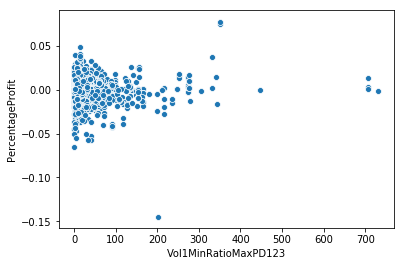

In [27]:
sns.scatterplot(d2['Vol1MinRatioMaxPD123'],d2['PercentageProfit'])

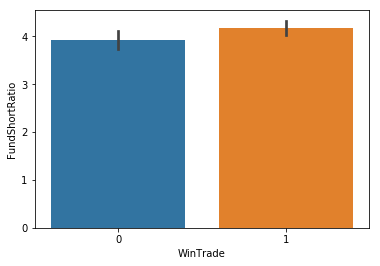

In [28]:
sns.barplot(d2.WinTrade,d2.FundShortRatio)

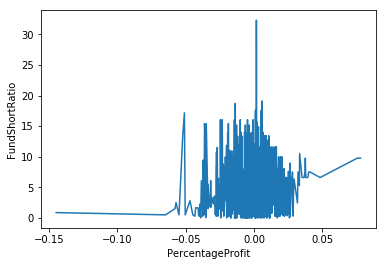

In [29]:
sns.lineplot(d2.PercentageProfit,d2.FundShortRatio)

In [30]:
round(X.shape[0]*0.6)

1733

In [31]:
len(d2.Fund52WeekChange)

2888

In [32]:
 d2.Fund52WeekChange=pd.to_numeric(d2.Fund52WeekChange.str.replace('%',''))/100

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [33]:
d2.Fund52WeekChange

9       -0.6515
16      -0.0650
23      -0.2444
24      -0.2240
25      -0.2240
32       0.2475
44       1.4506
46      -0.3541
48      -0.3721
56      -0.1992
64      -0.2215
70      -0.1728
83      -0.5789
87      -0.1728
92       0.0000
93      -0.1728
96      -0.3541
102      0.4479
105     -0.1728
115     -0.3848
116     -0.3848
118      0.4479
119      0.4479
120      0.4479
188      0.0855
223     -0.3412
255     -0.1936
265     -0.2182
266     -0.2182
269     -0.3721
          ...  
28554   -0.3697
28555   -0.3697
28556   -0.0766
28560   -0.1761
28561   -0.1761
28562    0.0855
28563    0.0855
28564    0.0855
28566    0.8767
28574    0.0000
28579   -0.3697
28581   -0.3697
28585    0.0000
28609    0.8767
28610    0.8767
28613    0.0000
28614   -0.1532
28615    1.3934
28616    1.3934
28617    0.8767
28624   -0.1532
28629    1.3934
28654    0.0855
28655    0.0855
28677   -0.3629
28680   -0.3629
28682   -0.3629
28684   -0.3629
28713   -0.0766
28840    0.4822
Name: Fund52WeekChange, 

In [34]:
X.Fund52WeekChange=d2.Fund52WeekChange

In [35]:
#d2.Fund52WeekChange=pd.Series(d)/100

In [36]:
#pd.to_numeric(re.sub('[%]', '', d2.Fund52WeekChange.iloc[0]))

In [37]:
d2.Fund52WeekChange.isnull().sum()

0

In [38]:
x_train=X.head(round(X.shape[0]*0.6))
y_train=Y.head(round(Y.shape[0]*0.6))
x_test=X.tail(round(X.shape[0]*0.4))
y_test=Y.tail(round(Y.shape[0]*0.4))

# Random Forest

In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [40]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)

In [41]:
RF.feature_importances_

array([0.13249796, 0.09857045, 0.11875848, 0.11449173, 0.12822061,
       0.14514788, 0.09110786, 0.09594432, 0.07526071])

Maximum value for TopFactor is 0.1451 and Minimum Value is 0.07526071

Text(0.5, 0, 'Relative Importance')

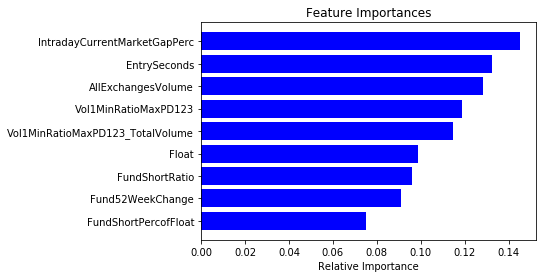

In [42]:
features=X.columns
importances = RF.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

Top 3 Factors is 1)IntradayCurrentMarketGapPerc 2)EntrySeconds 3)AllExchangeVolume

In [43]:
from sklearn.metrics import classification_report,accuracy_score,f1_score

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.38      0.45      0.41       469
           1       0.57      0.51      0.54       686

   micro avg       0.48      0.48      0.48      1155
   macro avg       0.48      0.48      0.48      1155
weighted avg       0.50      0.48      0.49      1155



In [45]:
print(accuracy_score(y_test,y_pred))

0.48398268398268396


In [46]:
print(f1_score(y_test,y_pred))

0.5386996904024768


# PCA

In [65]:
from sklearn.decomposition import PCA
pca_d2 = PCA(n_components=3)
principalComponents_d2 = pca_d2.fit_transform(x_train)

In [66]:
principal_d2 = pd.DataFrame(data = principalComponents_d2
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [67]:
principal_d2.tail()

,principal component 1,principal component 2,principal component 3
1728,0.930277,0.403019,-0.122578
1729,0.543161,0.265265,1.151699
1730,0.822787,0.356741,0.411301
1731,-0.727833,0.742899,-0.488712
1732,-0.694864,0.226837,-1.033842


In [68]:
print('Explained variation per principal component: {}'.format(pca_d2.explained_variance_ratio_))

Explained variation per principal component: [0.23552695 0.20168542 0.13319312]


From the above output, you can observe that the principal component 1 holds 23.5% of the information while the principal component 2 holds only 20%  while principal component 3 holds 13.3% of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 34.5% information was lost.

# Decision Tree

In [52]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [53]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [54]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.49956709956709955


# Logistic Regression

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [56]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.24      0.02      0.04       469
           1       0.59      0.95      0.73       686

   micro avg       0.58      0.58      0.58      1155
   macro avg       0.42      0.49      0.38      1155
weighted avg       0.45      0.58      0.45      1155

[[ 10 459]
 [ 31 655]]
0.5757575757575758


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# KNN

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [59]:
y_pred = classifier.predict(x_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[190 279]
 [270 416]]
              precision    recall  f1-score   support

           0       0.41      0.41      0.41       469
           1       0.60      0.61      0.60       686

   micro avg       0.52      0.52      0.52      1155
   macro avg       0.51      0.51      0.51      1155
weighted avg       0.52      0.52      0.52      1155



In [61]:
accuracy_score(y_test, y_pred)

0.5246753246753246

# From the above alogorithms Logistic Regression is best suitable algorithm for this datasets

# Supervised Learning-Regression 

In [62]:
import statsmodels.api   as sm
import scipy.stats       as stats
import matplotlib.pyplot as plt

In [63]:
# defining feature matrix(X) and response vector(y) 
X = d2[['IntradayCurrentMarketGapPerc','EntrySeconds','AllExchangesVolume']] 
y = d2.PercentageProfit

X = sm.add_constant(X) # Add an intercept to our model
print(X)

       const  IntradayCurrentMarketGapPerc  EntrySeconds  AllExchangesVolume
9        1.0                      4.685466       120.141              336197
16       1.0                      3.521739       126.398              209180
23       1.0                      4.540728       178.166              395044
24       1.0                      2.204688       106.193              149865
25       1.0                      2.204688       109.188              151331
32       1.0                     40.361446        63.513              769221
44       1.0                      5.717791       133.695              395064
46       1.0                      5.216426       378.774              673208
48       1.0                      5.265772       413.520              530478
56       1.0                      3.882779       234.758              289339
64       1.0                      2.333333       404.288              201639
70       1.0                      4.040000       364.884              563815

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [64]:
model         = sm.OLS(y, X).fit() ## OLS(output, input)
predictions   = model.predict(X)

## Print the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       PercentageProfit   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.460
Date:                Sun, 27 Oct 2019   Prob (F-statistic):             0.0609
Time:                        09:36:59   Log-Likelihood:                 8932.9
No. Observations:                2888   AIC:                        -1.786e+04
Df Residuals:                    2884   BIC:                        -1.783e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.0009      0.000     -2.042      0.041      -0.002   -3.47e-05
IntradayCurrentMarketGapPerc -2.938e-05   1.51e-05     -1.945      0.052    -5.9e-05    2.46e-07
EntrySeconds                  2.926e-06   1.77e-06      1.654      0.098   -5.42e-07    6.39e-06
AllExchangesVolume            1.876e-10   1.61e-10      1.165      0.244   -1.28e-10    5.03e-10
==============================================================================
Omnibus:                     1041.964   Durbin-Watson:                   1.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25933.208
Skew:                          -1.143   Prob(JB):                         0.00
Kurtosis:                      17.501   Cond. No.                     3.05e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Optimization

In [69]:
df=d2[["EntrySeconds","AllExchangesVolume","NetProfit"]]

In [70]:
df.head()

,EntrySeconds,AllExchangesVolume,NetProfit
9,120.141,336197,20
16,126.398,209180,-340
23,178.166,395044,-470
24,106.193,149865,44
25,109.188,151331,40


In [71]:
df.tail()

,EntrySeconds,AllExchangesVolume,NetProfit
28680,227.482,310579,668
28682,181.161,186427,1158
28684,227.482,310579,668
28713,61.722,405460,-610
28840,331.623,231168,1270


In [72]:
# Python Program to Convert seconds 
# into hours, minutes and seconds 
  
def convert(seconds): 
    seconds = seconds % (24 * 3600) 
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%d:%02d" % (hour, minutes) 

In [73]:
#for loop
A=[]
for i in df.EntrySeconds:
    A.append(convert(i))

In [74]:
A

['0:02',
 '0:02',
 '0:02',
 '0:01',
 '0:01',
 '0:01',
 '0:02',
 '0:06',
 '0:06',
 '0:03',
 '0:06',
 '0:06',
 '0:04',
 '0:05',
 '0:06',
 '0:04',
 '0:06',
 '0:06',
 '0:04',
 '0:01',
 '0:01',
 '0:04',
 '0:03',
 '0:02',
 '0:06',
 '0:06',
 '0:01',
 '0:03',
 '0:03',
 '0:06',
 '0:05',
 '0:05',
 '0:03',
 '0:04',
 '0:05',
 '0:01',
 '0:01',
 '0:01',
 '0:03',
 '0:05',
 '0:02',
 '0:03',
 '0:03',
 '0:00',
 '0:00',
 '0:04',
 '0:04',
 '0:04',
 '0:04',
 '0:03',
 '0:01',
 '0:02',
 '0:06',
 '0:04',
 '0:03',
 '0:02',
 '0:04',
 '0:02',
 '0:02',
 '0:06',
 '0:02',
 '0:03',
 '0:06',
 '0:03',
 '0:04',
 '0:02',
 '0:02',
 '0:00',
 '0:02',
 '0:03',
 '0:05',
 '0:03',
 '0:06',
 '0:05',
 '0:02',
 '0:02',
 '0:02',
 '0:02',
 '0:01',
 '0:04',
 '0:03',
 '0:01',
 '0:04',
 '0:01',
 '0:04',
 '0:03',
 '0:02',
 '0:05',
 '0:04',
 '0:03',
 '0:00',
 '0:04',
 '0:06',
 '0:02',
 '0:04',
 '0:02',
 '0:04',
 '0:04',
 '0:02',
 '0:00',
 '0:00',
 '0:02',
 '0:02',
 '0:02',
 '0:04',
 '0:03',
 '0:03',
 '0:03',
 '0:04',
 '0:04',
 '0:03',
 

In [75]:
df["new"]=pd.Series(A)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
df.head()

,EntrySeconds,AllExchangesVolume,NetProfit,new
9,120.141,336197,20,0:03
16,126.398,209180,-340,0:06
23,178.166,395044,-470,0:02
24,106.193,149865,44,0:06
25,109.188,151331,40,0:06


In [77]:
df2=df.NetProfit.groupby(df.new).sum()

In [78]:
df2

new
0:00    4430
0:01     950
0:02    1624
0:03   -2964
0:04   -9674
0:05   -3246
0:06     696
Name: NetProfit, dtype: int64

In [80]:
df4=df2[df2==min(df2)]
df4

new
0:04   -9674
Name: NetProfit, dtype: int64

In [79]:
df4=df2[df2==max(df2)]
df4

new
0:00    4430
Name: NetProfit, dtype: int64

In [87]:
z=df4.index[0]

In [82]:
final=df[df["new"]==z]

In [84]:
final.to_csv("Trades_Calculation_0m-6m_Results.csv")

In [85]:
final

,EntrySeconds,AllExchangesVolume,NetProfit,new
46,378.774,673208,14,0:04
48,413.520,530478,14,0:04
56,234.758,289339,-620,0:04
64,404.288,201639,30,0:04
96,417.273,713772,-176,0:04
118,251.858,560418,188,0:04
344,272.742,465660,230,0:04
524,244.663,473323,-1584,0:04
720,149.178,249677,1026,0:04
721,149.729,250400,896,0:04


# Visualizing and Animating Optimization Algorithms with Matplotlib

In [88]:
%matplotlib inline

In [89]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

We shall restrict our attention to 3-dimensional problems for right now (i.e. optimizing over only 2 parameters), though what follows can be extended to higher dimensions by plotting all pairs of parameters against each other, effectively projecting the problem to 3-dimensions.
The Wikipedia article on Test functions for optimization has a few functions that are useful for evaluating optimization algorithms. In particular, we shall look at Beale's function:
f(x,y)=(1.5−x+xy)2+(2.25−x+xy2)2+(2.625−x+xy3)2

In [90]:
x=final["EntrySeconds"]
y=final["NetProfit"]

In [91]:
f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [92]:
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

In [93]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

In [94]:
z = f(x, y)

We know the global minima is at (3,0.5)

In [95]:
minima = np.array([3., .5])

In [96]:
f(*minima)

0.0

In [97]:
minima_ = minima.reshape(-1, 1)
minima

array([3. , 0.5])

In [98]:
f(*minima_)

array([0.])

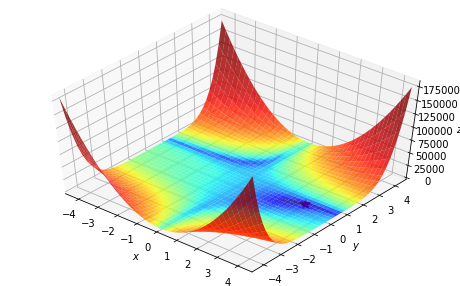

In [99]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

In [100]:
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

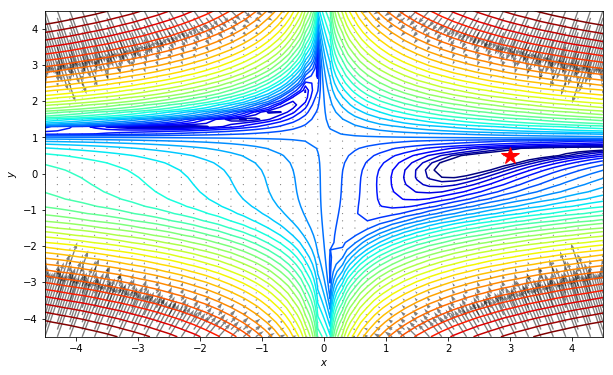

In [101]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()


Gradient-based Optimization For the purposes of this demonstration, we use SciPy's optimization methods. It goes without saying that the code and patterns for producing these visualizations generalizes easily to other optimization tools and libraries.
We set the starting point as (3,4) , since it is challenging for algorithms with a little too much momentum in the gradient descent update rule, as they may overshoot and end up in some local minima.

In [102]:
x0 = np.array([3., 4.])

Again, we use autograd to compute the gradients, and augment the function slightly to adhere to Scipy's optimization interface

In [103]:
func = value_and_grad(lambda args: f(*args))

The method we use first is Newton-CG, and set the callback simply as print. Note that we can only do this in Python 3, where print is an actual function.

In [104]:
res = minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-20, callback=print)

[2.71113991 3.35161828]
[2.48008912 2.78955116]
[2.29965866 2.30123678]
[2.16373347 1.8756312 ]
[2.06741079 1.50235414]
[2.00766238 1.17079384]
[1.98485905 0.86972447]
[2.00511126 0.59071489]
[2.07692544 0.34891823]
[2.17857778 0.21644485]
[2.55966682 0.38003383]
[2.80228089 0.44954972]
[2.94477854 0.48765376]
[2.94564749 0.48601427]
[2.95359059 0.48810805]
[2.97113927 0.49269804]
[2.99870879 0.49976069]
[2.99999481 0.49999876]
[3.00000001 0.49999999]
[3.  0.5]
[3.  0.5]


In [107]:
dict(res)

{'fun': 2.5770606809684326e-18,
 'jac': array([8.13600382e-10, 1.86117137e-09]),
 'nfev': 22,
 'njev': 104,
 'nhev': 0,
 'status': 0,
 'success': True,
 'message': 'Optimization terminated successfully.',
 'x': array([3. , 0.5]),
 'nit': 21}

The results look plausibly good, but would be more convincing with some visualization. Let us define a new callback function that appends the intermediate values to a list instead of simply printing it

In [108]:
def make_minimize_cb(path=[]):
    
    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))

    return minimize_cb

In [109]:
path_ = [x0]

In [110]:
res = minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-20, callback=make_minimize_cb(path_))

In [111]:
dict(res)

{'fun': 2.5770606809684326e-18,
 'jac': array([8.13600382e-10, 1.86117137e-09]),
 'nfev': 22,
 'njev': 104,
 'nhev': 0,
 'status': 0,
 'success': True,
 'message': 'Optimization terminated successfully.',
 'x': array([3. , 0.5]),
 'nit': 21}

In [112]:
path = np.array(path_).T
path.shape

(2, 22)

(-4.5, 4.5)

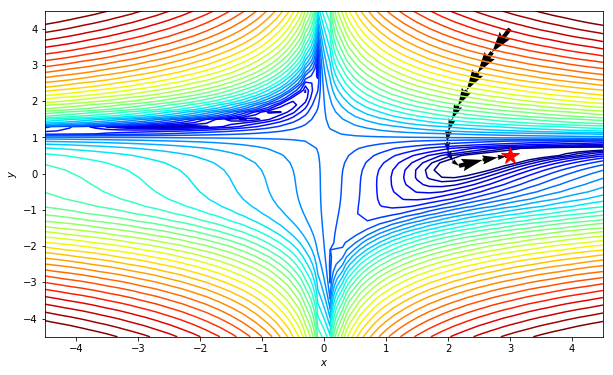

In [113]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

(-4.5, 4.5)

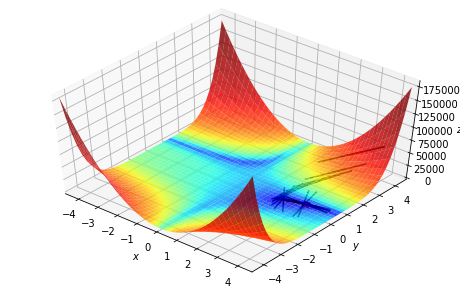

In [114]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], f(*path[::,:-1]), 
          path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], f(*(path[::,1:]-path[::,:-1])), 
          color='k')
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

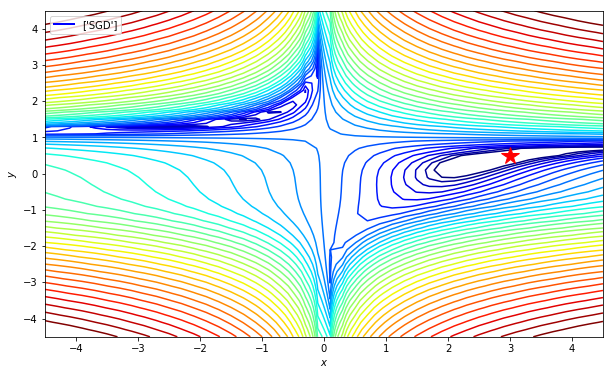

In [115]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=18)

line, = ax.plot([], [], 'b', label=['SGD'], lw=2)
point, = ax.plot([], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [116]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

In [117]:
def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

We define the total number of frames to be the total number of steps taken in the optimization and using blitting so as to only redraw the parts of the animation that have changed.

In [118]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

Modularizing and Generalizing to Animate Multiple Paths Simultaneously Instead of initializing the line and point in the global scope, and defining the animation callback functions to use those global variables, we can encapsulate everything in a closure.
Or better yet, we could just create subclass of FuncAnimation that is initialized with a variable number of paths to plot. In the initialization method, we just create and save the list of Line2D objects as attributes, and define animation callback methods that use these attributes.

In [119]:
class TrajectoryAnimation(animation.FuncAnimation):
    
    def __init__(self, *paths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths

        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]
        self.points = [ax.plot([], [], 'o', color=line.get_color())[0] 
                       for line in self.lines]

        super(TrajectoryAnimation, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line, point in zip(self.lines, self.points):
            line.set_data([], [])
            point.set_data([], [])
        return self.lines + self.points

    def animate(self, i):
        for line, point, path in zip(self.lines, self.points, self.paths):
            line.set_data(*path[::,:i])
            point.set_data(*path[::,i-1:i])
        return self.lines + self.points

In [120]:
class TrajectoryAnimation3D(animation.FuncAnimation):
    
    def __init__(self, *paths, zpaths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths
        self.zpaths = zpaths
        
        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]

        super(TrajectoryAnimation3D, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line in self.lines:
            line.set_data([], [])
            line.set_3d_properties([])
        return self.lines

    def animate(self, i):
        for line, path, zpath in zip(self.lines, self.paths, self.zpaths):
            line.set_data(*path[::,:i])
            line.set_3d_properties(zpath[:i])
        return self.lines

In [121]:
methods = [
    "SGD",
    "Momentum",
    "NAG",
    "Adagrad",
    "Adadelta",
    "Rmsprop"
]

In [122]:
minimize_ = partial(minimize, fun=func, x0=x0, jac=True, bounds=[(xmin, xmax), (ymin, ymax)], tol=1e-20)

In [123]:
paths_ = defaultdict(list)
for method in methods:
    paths_[method].append(x0)

In [124]:
paths = [np.array(paths_[method]).T for method in methods]

In [125]:
zpaths = [f(*path) for path in paths]

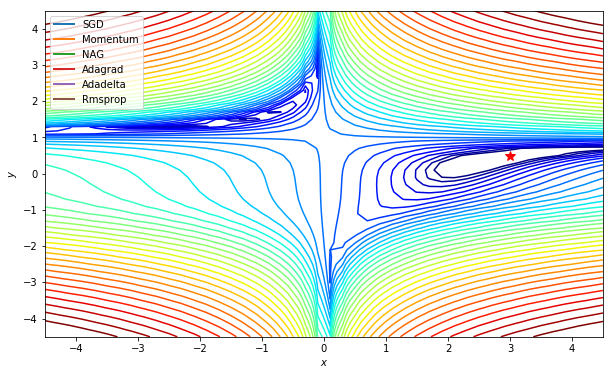

In [126]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation(*paths, labels=methods, ax=ax)

ax.legend(loc='upper left')